In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df1=pd.read_csv("takehome_users.csv", encoding='ISO-8859-1')

In [7]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [8]:
print(df1.shape)

(12000, 10)


In [9]:
df2=pd.read_csv("takehome_user_engagement.csv")

In [10]:
print(df2.shape)

(207917, 3)


In [11]:
merged_data = pd.merge(df1, df2, left_on='object_id' , right_on='user_id')

In [12]:
merged_data.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'time_stamp', 'user_id', 'visited'],
      dtype='object')

In [13]:
merged_data.shape

(207917, 13)

In [14]:
merged_data['date'] = merged_data['time_stamp'].astype('datetime64')
merged_data['week'] = merged_data['date'].dt.isocalendar().week
merged_data['year'] = merged_data['date'].dt.isocalendar().year
merged_data['month'] = merged_data['date'].dt.month

In [15]:
merged_data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visited,date,week,year,month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,17,2014,4
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,46,2013,11
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04,48,2013,11
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04,50,2013,12
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04,52,2013,12


In [16]:
gd=merged_data.groupby(['user_id','org_id','year' ,'month', 'week' , 'visited']).size()
dff = gd.to_frame(name = 'weekly_visited').reset_index()
print(dff.info)

<bound method DataFrame.info of        user_id  org_id  year  month  week  visited  weekly_visited
0            1      11  2014      4    17        1               1
1            2       1  2013     11    46        1               1
2            2       1  2013     11    48        1               1
3            2       1  2013     12    50        1               1
4            2       1  2013     12    52        1               1
...        ...     ...   ...    ...   ...      ...             ...
75928    11996      89  2013      9    36        1               1
75929    11997     200  2013      1     3        1               1
75930    11998      83  2014      4    17        1               1
75931    11999       6  2012      6    22        1               1
75932    12000       0  2014      1     4        1               1

[75933 rows x 7 columns]>


In [17]:
df3 = dff[dff['weekly_visited'] >= 3]
df3

,user_id,org_id,year,month,week,visited,weekly_visited
6,2,1,2014,2,6,1,3
30,10,318,2013,4,15,1,3
32,10,318,2013,4,17,1,3
34,10,318,2013,5,18,1,3
35,10,318,2013,5,19,1,5
...,...,...,...,...,...,...,...
75886,11975,31,2014,5,21,1,3
75905,11988,114,2014,3,12,1,4
75912,11988,114,2014,4,18,1,3
75915,11988,114,2014,5,20,1,3


In [18]:
df3.head()

,user_id,org_id,year,month,week,visited,weekly_visited
6,2,1,2014,2,6,1,3
30,10,318,2013,4,15,1,3
32,10,318,2013,4,17,1,3
34,10,318,2013,5,18,1,3
35,10,318,2013,5,19,1,5


# Data Visualization 

In [19]:
countt= merged_data.groupby(['creation_source']).size()
countt = countt.to_frame(name = 'size').reset_index()

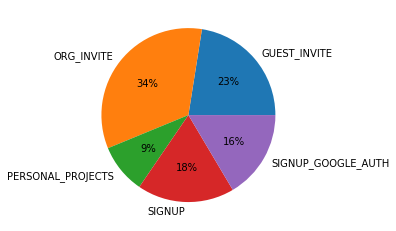

In [20]:
y = np.array(countt['size'])
label = np.array(countt['creation_source'])
plt.pie(y, labels =label, autopct='%1.0f%%')
plt.show()

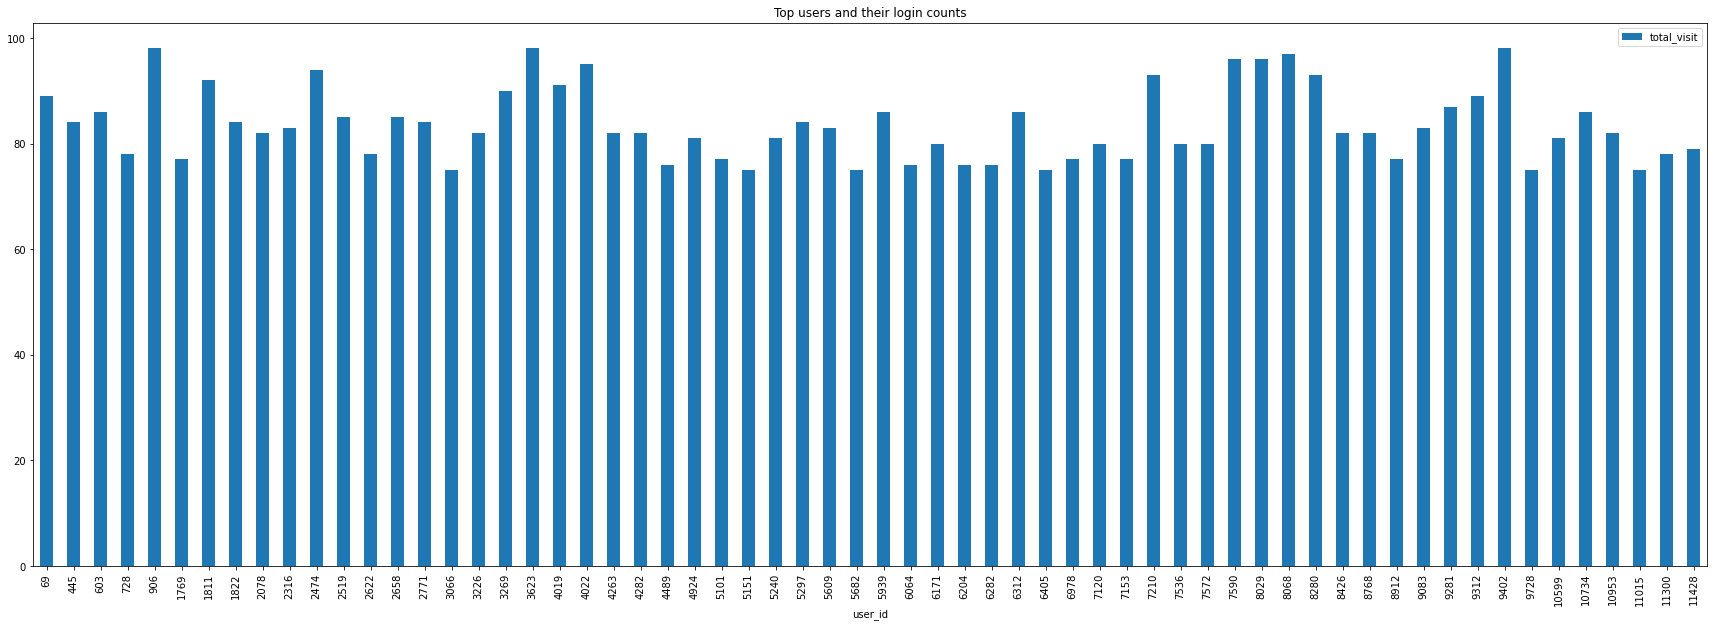

In [21]:
df4=df3
df4 = df4.groupby(['user_id','org_id']).size()
df4 = df4.to_frame(name = 'total_visit').reset_index()
p= df4[df4['total_visit'] >=75]
p.plot.bar(x='user_id', y='total_visit', figsize=(30,10), title="Top users and their login counts")
plt.show()

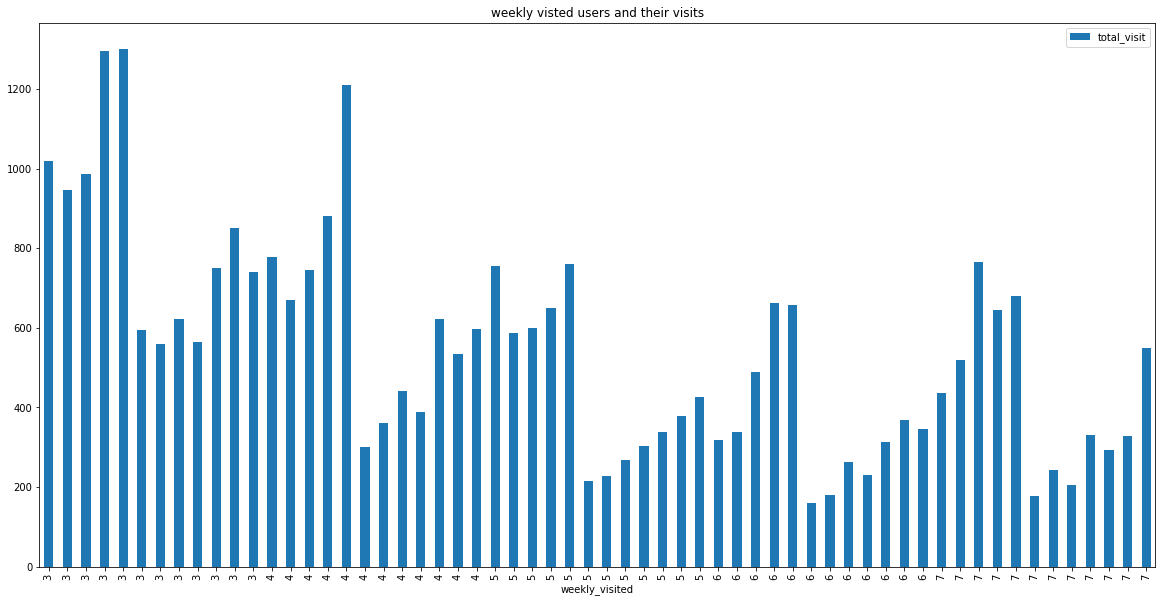

In [24]:
df5=df3
df5= df5.groupby(['weekly_visited','month']).size()
df5 = df5.to_frame(name = 'total_visit').reset_index()
t= df5[df5['total_visit']>=3]
t.plot.bar(x='weekly_visited', y='total_visit', figsize=(20,10), title="weekly visted users and their visits")
plt.show()

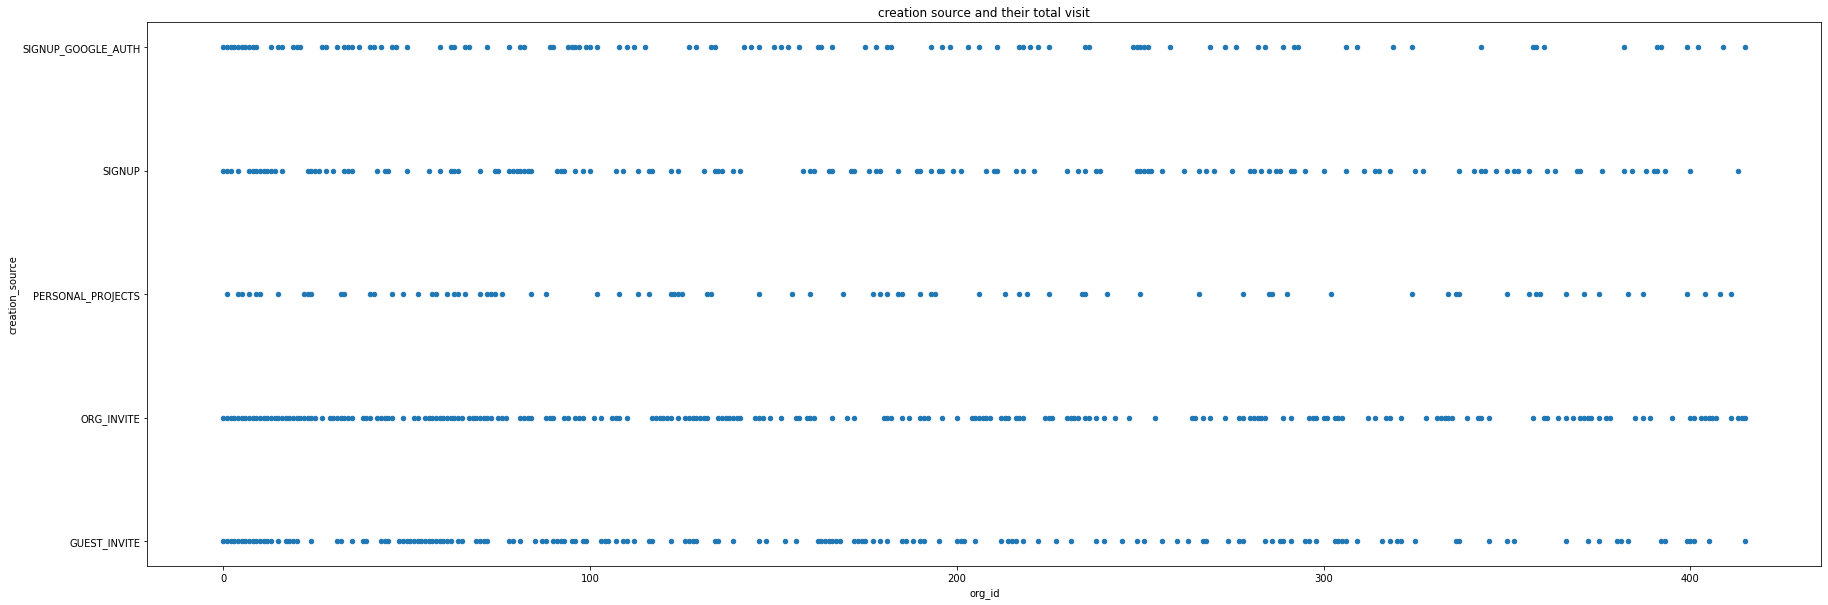

In [25]:
df6=merged_data
df6 = df6.groupby(['creation_source','org_id']).size()
df6 = df6.to_frame(name = 'total_visit').reset_index()
o= df6[df6['total_visit']>=50]
o.plot.scatter(x='org_id', y='creation_source', figsize=(30,10), title="creation source and their total visit")
plt.show()

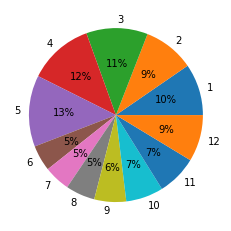

In [26]:
c= merged_data.groupby(['month']).size()
c = c.to_frame(name = 'size').reset_index()
y = np.array(c['size'])
label = np.array(c['month'])
plt.pie(y, labels =label, autopct='%1.0f%%')
plt.show()